## Sentiment Analysis Model
This code builds and trains a sentiment analysis model using:

1.Embedding Layer: Converts word indices to dense vectors.

2.Stacked LSTM Layers: Captures sequential patterns in the text.

3.Dense Output Layer: Predicts sentiment (positive/negative).

4.Callbacks: Improve training efficiency and prevent overfitting 

(used to monitor training (e.g., track loss or accuracy),

modify training behavior (e.g., stop training early, adjust learning rate),

save the model or log progress).

In [1]:
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.datasets import imdb
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import matplotlib.pyplot as plt

In [ ]:
# Measure the execution time of the cell
# load dataset with a vocab size
vocab_size = 2000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

In [4]:
# Ensures that all sequences (e.g., reviews) have the same length by adding padding (usually 0s)
#  to shorter sequences or truncating longer ones because Neural networks require fixed-length inputs,
#  so padding ensures uniformity
max_len = 150
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

print("X_train shape is ", X_train.shape)
print("X_test shape is ", X_test.shape)

X_train shape is  (25000, 150)
X_test shape is  (25000, 150)


In [5]:
X_train[:1]

array([[  12,   16,   43,  530,   38,   76,   15,   13, 1247,    4,   22,
          17,  515,   17,   12,   16,  626,   18,    2,    5,   62,  386,
          12,    8,  316,    8,  106,    5,    4,    2,    2,   16,  480,
          66,    2,   33,    4,  130,   12,   16,   38,  619,    5,   25,
         124,   51,   36,  135,   48,   25, 1415,   33,    6,   22,   12,
         215,   28,   77,   52,    5,   14,  407,   16,   82,    2,    8,
           4,  107,  117,    2,   15,  256,    4,    2,    7,    2,    5,
         723,   36,   71,   43,  530,  476,   26,  400,  317,   46,    7,
           4,    2, 1029,   13,  104,   88,    4,  381,   15,  297,   98,
          32,    2,   56,   26,  141,    6,  194,    2,   18,    4,  226,
          22,   21,  134,  476,   26,  480,    5,  144,   30,    2,   18,
          51,   36,   28,  224,   92,   25,  104,    4,  226,   65,   16,
          38, 1334,   88,   12,   16,  283,    5,   16,    2,  113,  103,
          32,   15,   16,    2,   19, 

In [ ]:
model = Sequential()
# converts each word index into a 100-dimensional vector.
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_len))
# (input_dim=vocab_size) specifies the size of the vocabulary,
# i.e., the number of unique words in the dataset
# The num_words=vocab_size argument ensures that only the top vocab_size most frequent words are included in the dataset
# If max_len=150, each input sequence will have exactly 150 elements (word indices)

# Sttacked LSTM layers
# (return_sequences=True) outputs the full sequence of hidden states (used for stacked LSTMs)
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50)) # last LSTM layer without return-seq

model.add(Dense(units=1, activation='sigmoid'))

c:\Users\TUF GAMING\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [7]:
# Configures the model for training by specifying the optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])
# metrics=['accuracy']: Tracks accuracy during training

In [8]:
# Definre callbacks
# Stops training if the monitored metric (e.g., validation loss) does not improve for a specified number of epochs (patience)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Reduces the learning rate if the monitored metric (e.g., validation loss) 
# does not improve for a specified number of epochs (patience). It helps the model
# converge better by reducing the learning rate when it gets stuck in a plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

epochs = 100
batch_size = 64

In [9]:
%%time
# The model trains and stores the training history in history
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test[:100], y_test[:100]),
                    callbacks=[early_stopping,reduce_lr]

)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 131s 315ms/step - accuracy: 0.6364 - loss: 0.6205 - val_accuracy: 0.7000 - val_loss: 0.5889 - learning_rate: 0.0010
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 105s 269ms/step - accuracy: 0.8113 - loss: 0.4443 - val_accuracy: 0.8500 - val_loss: 0.3447 - learning_rate: 0.0010
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 100s 254ms/step - accuracy: 0.8480 - loss: 0.3599 - val_accuracy: 0.9000 - val_loss: 0.2814 - learning_rate: 0.0010
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 219s 561ms/step - accuracy: 0.8795 - loss: 0.2875 - val_accuracy: 0.9300 - val_loss: 0.2586 - learning_rate: 0.0010
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 163s 418ms/step - accuracy: 0.8936 - loss: 0.2710 - val_accuracy: 0.8900 - val_loss: 0.3044 - learning_rate: 0.0010
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 121s 309ms/step - accuracy: 0.9045 - loss: 0.2393 - val_accuracy: 0.8900 - val_loss: 0.2779 - learning_rate: 0.0010
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 108s 277ms/step -

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.8696 - loss: 0.3027
Test loss: 0.3017
Test Accuracy: 0.8690


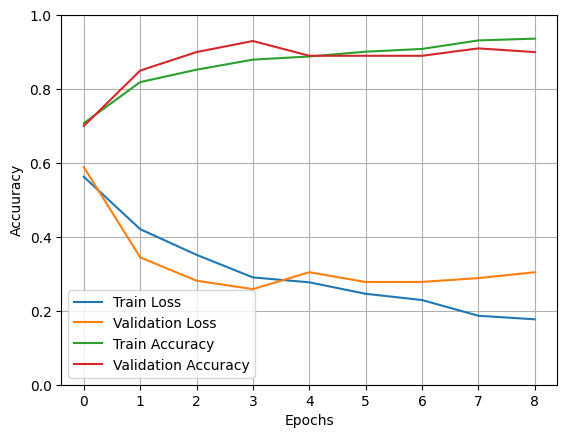

In [12]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuuracy')
plt.ylim([0,1])
plt.legend()
plt.grid()